In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
train=pd.read_csv('Loan_train.csv')
test=pd.read_csv('Loan_test.csv')
sample=pd.read_csv('Loan Sample submission.csv')

In [61]:
train.head()
test.head()
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [62]:
sample.Loan_Status.value_counts()

Loan_Status
N    367
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

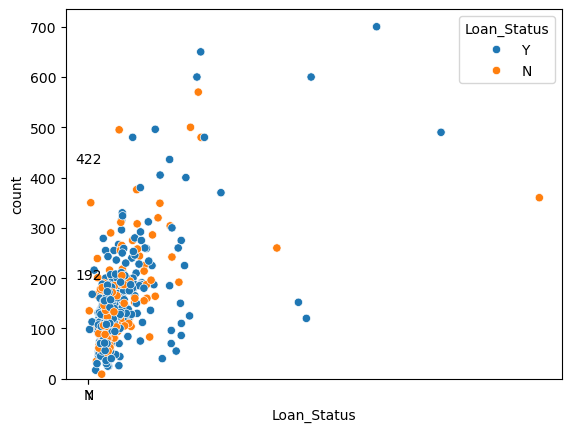

In [63]:
ax = sns.countplot(x='Loan_Status', data=train)
ax.bar_label(ax.containers[0])
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', data = train )

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

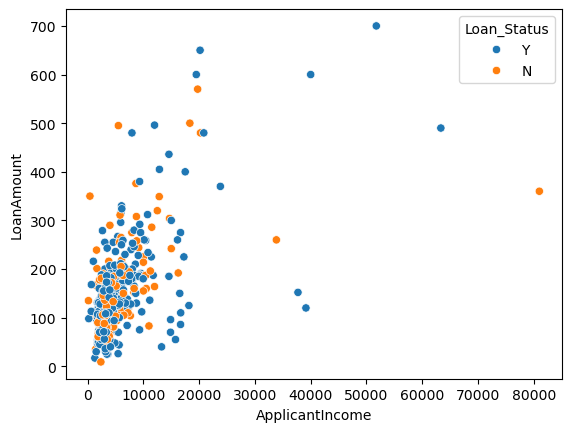

In [64]:
sns.scatterplot(x ='ApplicantIncome', y='LoanAmount',hue='Loan_Status',data=train)

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

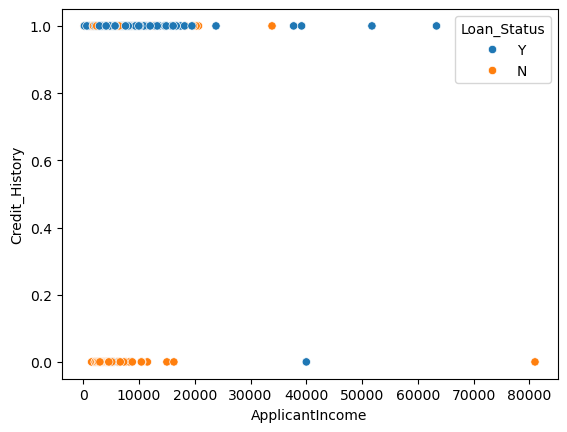

In [65]:
sns.scatterplot(x ='ApplicantIncome', y='Credit_History',hue='Loan_Status',data=train)

In [66]:
train.groupby('Education')['Loan_Status'].value_counts(normalize = True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: proportion, dtype: float64

In [67]:
train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize = True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: proportion, dtype: float64

In [68]:
train.groupby('Married')['Loan_Status'].value_counts(normalize = True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: proportion, dtype: float64

In [69]:
train.groupby(['Education', 'Married'])['Loan_Status'].value_counts(normalize = True)

Education     Married  Loan_Status
Graduate      No       Y              0.630952
                       N              0.369048
              Yes      Y              0.747573
                       N              0.252427
Not Graduate  No       Y              0.622222
                       N              0.377778
              Yes      Y              0.606742
                       N              0.393258
Name: proportion, dtype: float64

In [70]:
train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True)

Education     Married  Property_Area  Loan_Status
Graduate      No       Rural          Y              0.608696
                                      N              0.391304
                       Semiurban      Y              0.666667
                                      N              0.333333
                       Urban          Y              0.610169
                                      N              0.389831
              Yes      Rural          Y              0.658824
                                      N              0.341176
                       Semiurban      Y              0.819672
                                      N              0.180328
                       Urban          Y              0.735294
                                      N              0.264706
Not Graduate  No       Rural          Y              0.588235
                                      N              0.411765
                       Semiurban      Y              0.823529
                    

In [71]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: proportion, dtype: float64

In [72]:
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize = True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: proportion, dtype: float64

In [73]:
grouped = train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

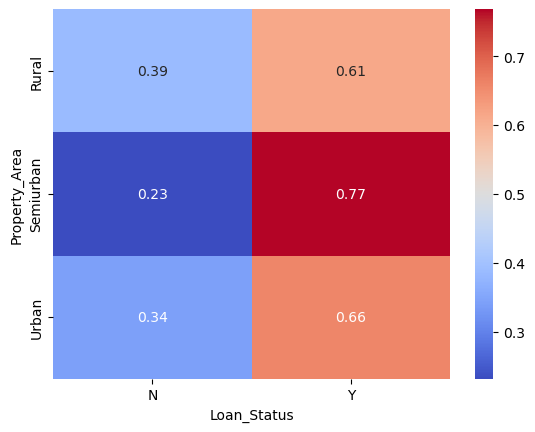

In [74]:
sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

In [75]:
grouped = train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Education-Married-Property_Area'>

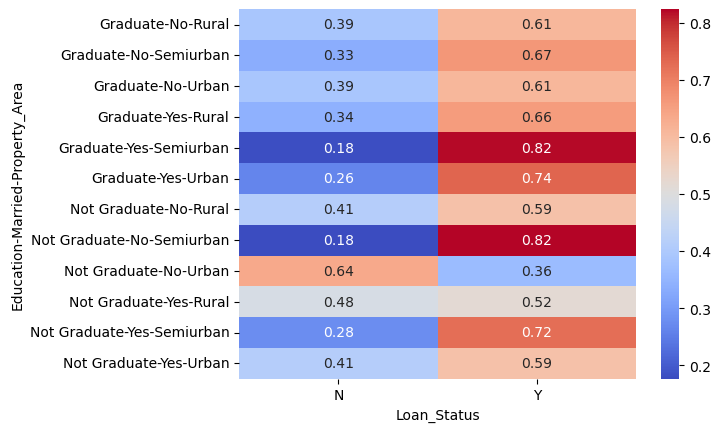

In [76]:
sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

<Axes: xlabel='Education,Married,Property_Area'>

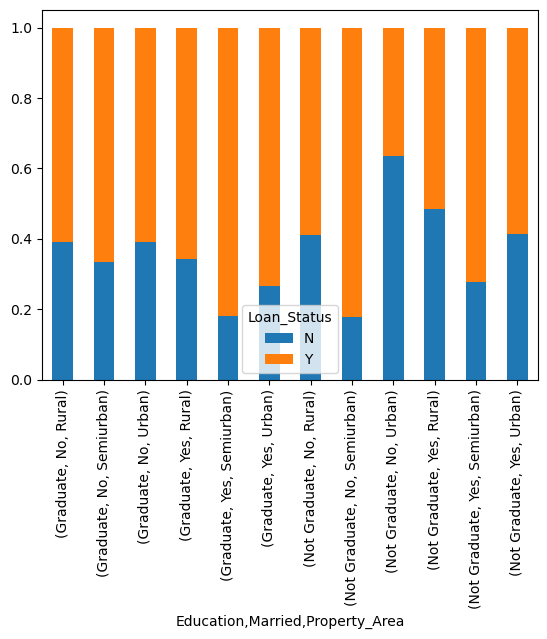

In [77]:
grouped.plot(kind = 'bar', stacked = True)

In [78]:
train['Loan_Status'].replace({'Y':1, 'N': 0}, inplace = True)

C:\Users\Vishali\AppData\Local\Temp\ipykernel_13972\4145894878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Loan_Status'].replace({'Y':1, 'N': 0}, inplace = True)
C:\Users\Vishali\AppData\Local\Temp\ipykernel_13972\4145894878.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['L

In [79]:
train.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

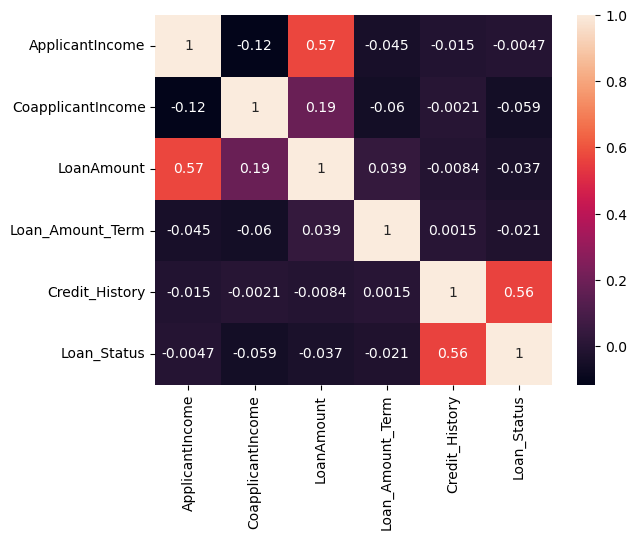

In [101]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)

In [103]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
train.select_dtypes(exclude=np.number).isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [111]:
cat_impute=['Gender','Married','Dependents','Self_Employed']
for colum in cat_impute:
    train[colum].fillna(train[colum].mode()[0],inplace=True)

C:\Users\Vishali\AppData\Local\Temp\ipykernel_13972\822788200.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[colum].fillna(train[colum].mode()[0],inplace=True)


In [ ]:
train['Dependents

In [113]:
cat_impute=['LoanAmount','Loan_Amount_Term']
for colum in cat_impute:
    train[colum].fillna(train[colum].median()[0],inplace=True)

TypeError: 'float' object is not subscriptable